In [0]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [0]:
class Image(object):
  def __init__(self, path):
    self.path = path

    self.rgb_image = None
    self.bgr_image = None
    self.gray_image = None


  def read_image(self, return_image = False):
    self.rgb_image = plt.imread(self.path)
    if return_image:
      return self.rgb_image


  def bgr(self, return_image = False):
    self.bgr_image = np.flip(plt.imread(self.path), 2)
    if return_image:
      return self.bgr_image


  def gray(self, return_image = False):
    self.gray_image = cv2.cvtColor(plt.imread(self.path), cv2.COLOR_RGB2GRAY)
    if return_image:
      return self.gray_image


  def show(self, image, title = 'image'):
    if len(image.shape) == 3:
      plt.imshow(image)
    else:
      plt.imshow(image, cmap = 'gray')

    plt.title(title)


  def show_all(self, image_list, title_list):
    assert len(image_list) == len(title_list), "Incompatible lengths of lists!"
    N = len(image_list)
    plt.figure(figsize=[20, 20])

    for i in range(N):
      plt.subplot(1, N, i + 1)
      self.show(image_list[i], title_list[i])
    
    plt.show()

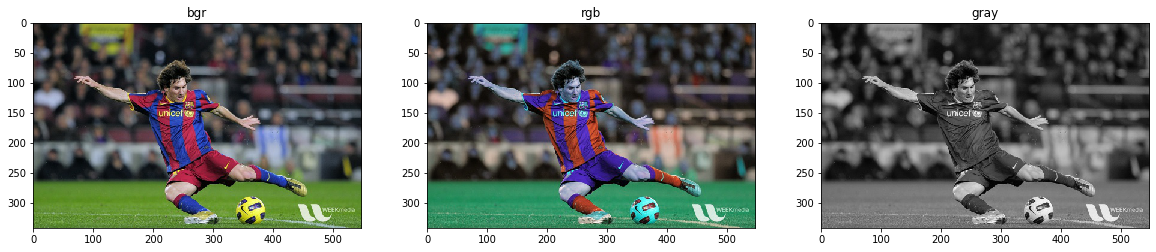

In [142]:
image = Image("./images/messi.jpg")
rgb = image.read_image(True)
bgr = image.bgr(True)
gray = image.gray(True)
image.show_all([rgb, bgr, gray], ["bgr", "rgb", "gray"])

In [0]:
def current_iteration_convolve2d(current_mat, kernel):
  assert current_mat.shape[0] == kernel.shape[0] and current_mat.shape[1] == kernel.shape[1], "Incompatible sizes of matrices!"
  sum = 0
  for row_current_mat, row_kernel in zip(current_mat, kernel):
    sum += np.dot(row_current_mat, row_kernel)
  return sum


def rgb_current_iteration_convolve2d(current_mat, kernel):
  rgb_sums = np.zeros(3)

  red_sum = current_mat[:, :, 0]
  green_sum = current_mat[:, :, 1]
  blue_sum = current_mat[:, :, 2]

  rgb_sums[0] = current_iteration_convolve2d(red_mat, kernel)
  rgb_sums[1] = current_iteration_convolve2d(green_mat, kernel)
  rgb_sums[2] = current_iteration_convolve2d(blue_mat, kernel) 

  return rgb_matrices


def convolve2d(image, kernel):
  image = cv2.normalize(image, None, alpha=0, beta=1,
                        norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  
  if len(image.shape) < 3: # A gray image
    new_shape = (image.shape[0] - kernel.shape[0] + 1,
                 image.shape[1] - kernel.shape[1] + 1)
  else: # RGB image
    new_shape = (image.shape[0] - kernel.shape[0] + 1,
                 image.shape[1] - kernel.shape[1] + 1, 3)
  
  new_image = np.zeros(new_shape)
  for i in range(new_shape[0]):
    for j in range(new_shape[1]):
      current_mat = image[i : i + kernel.shape[0], j : j + kernel.shape[1]]

      if len(image.shape) < 3: # A gray image
        current_sum = current_iteration_convolve2d(current_mat, kernel)
        new_image[i][j] = current_sum
      else: # RGB image
        current_sum = rgb_current_iteration_convolve2d(current_mat, kernel)
        new_image[i][j][0] = current_sum[0] # Red
        new_image[i][j][1] = current_sum[1] # Green
        new_image[i][j][2] = current_sum[2] # Blue

  return new_image

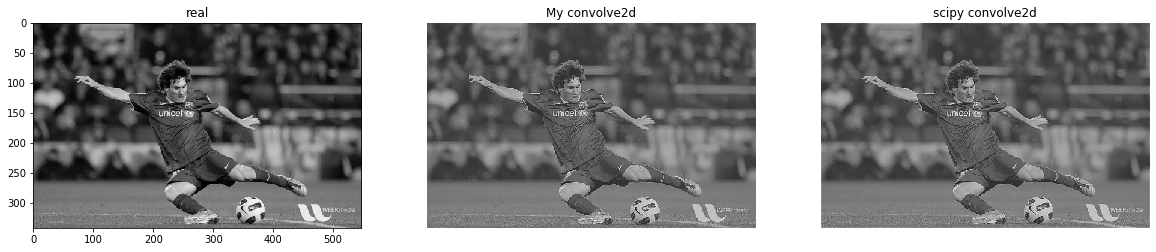

In [173]:
kernel = np.array([[0, -1, 0], [-1, 8, -1], [0, -1, 0]]) / 4
image_equalized = gray / np.max(np.abs(gray))
image_kernel = convolve2d(image_equalized, kernel)
plt.figure(figsize = [20, 10])
plt.subplot(131)
plt.imshow(image_equalized, cmap=plt.cm.gray)
plt.title('real')
plt.subplot(132)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title('My convolve2d')
plt.axis('off')

import scipy.signal
image_kernel = scipy.signal.convolve2d(image_equalized, kernel, 'same')
plt.subplot(133)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title("scipy convolve2d")
plt.axis('off')
plt.show()

In [0]:
# Filters are a set of uniqe operations on images, which affect on images' 
# vision, according to some preferences. For example: blurring, sharpening,
# embossing, edge detection, and more. These operations are made by 
# the convolution method, which takes the image and the kind of filter
# (called kernel), represented by it's specific matrix, as arguments. The kernel
# matrix is also called "Convolution matrix" or "Mask". The result of the
# convolution method is a new image, filtered by the given kernel.
# The kernel used in the exercise above, is a sharpening filter, making the new 
# image sharper than before.